In [44]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

In [45]:
(mg_k13_20211007_lidar,z_k13_20211007_lidar) = read_esri_ascii("k13/wsyr2/k13_20211007_lidar.asc", \
    name='topographic__elevation')

(mg_k13_20211007_sfm,z_k13_20211007_sfm) = read_esri_ascii("k13/wsyr2/k13_20211007_sfm.asc", \
    name='topographic__elevation')

(mg_k13_20220208_sfm,z_k13_20220208_sfm) = read_esri_ascii("k13/wsyr2/k13_20220208_sfm.asc", \
    name='topographic__elevation')

(mg_k13_20220503_sfm,z_k13_20220503_sfm) = read_esri_ascii("k13/wsyr2/k13_20220503_sfm.asc", \
    name='topographic__elevation')

(mg_k13_20220531_sfm,z_k13_20220531_sfm) = read_esri_ascii("k13/wsyr2/k13_20220531_sfm.asc", \
    name='topographic__elevation')

# (mg_m14_20220428_sfm,z_m14_20220428_sfm) = read_esri_ascii("m14/wsyr2/m14_20220428_sfm.asc", \
#     name='topographic__elevation')

# (mg_m14_20220601_sfm,z_m14_20220601_sfm) = read_esri_ascii("m14/wsyr2/m14_20220601_sfm.asc", \
#     name='topographic__elevation')

In [46]:
mg_k13_20211007_lidar.set_nodata_nodes_to_closed(z_k13_20211007_lidar, -9999)
mg_k13_20211007_sfm.set_nodata_nodes_to_closed(z_k13_20211007_sfm, -9999)
mg_k13_20220208_sfm.set_nodata_nodes_to_closed(z_k13_20220208_sfm, -9999)
mg_k13_20220503_sfm.set_nodata_nodes_to_closed(z_k13_20220503_sfm, -9999)
mg_k13_20220531_sfm.set_nodata_nodes_to_closed(z_k13_20220531_sfm, -9999)
# mg_m14_20220428_sfm.set_nodata_nodes_to_closed(z_m14_20220428_sfm, -9999)
# mg_m14_20220601_sfm.set_nodata_nodes_to_closed(z_m14_20220601_sfm, -9999)

In [47]:
fa_k13_20211007_lidar = FlowAccumulator(mg_k13_20211007_lidar,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_k13_20211007_sfm = FlowAccumulator(mg_k13_20211007_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_k13_20220208_sfm = FlowAccumulator(mg_k13_20220208_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_k13_20220503_sfm = FlowAccumulator(mg_k13_20220503_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_k13_20220531_sfm = FlowAccumulator(mg_k13_20220531_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

# fa_m14_20220428_sfm = FlowAccumulator(mg_m14_20220428_sfm,
#                      surface='topographic__elevation',
#                      flow_director='FlowDirectorD8',
#                      runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
#                      depression_finder='DepressionFinderAndRouter')

# fa_m14_20220601_sfm = FlowAccumulator(mg_m14_20220601_sfm,
#                      surface='topographic__elevation',
#                      flow_director='FlowDirectorD8',
#                      runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
#                      depression_finder='DepressionFinderAndRouter')

In [48]:
(da_k13_20211007_lidar, discharge_k13_20211007_lidar) = fa_k13_20211007_lidar.accumulate_flow()
(da_k13_20211007_sfm, discharge_k13_20211007_sfm) = fa_k13_20211007_sfm.accumulate_flow()
(da_k13_20220208_sfm, discharge_k13_20220208_sfm) = fa_k13_20220208_sfm.accumulate_flow()
(da_k13_20220503_sfm, discharge_k13_20220503_sfm) = fa_k13_20220503_sfm.accumulate_flow()
(da_k13_20220531_sfm, discharge_k13_20220531_sfm) = fa_k13_20220531_sfm.accumulate_flow()
# (da_m14_20220428_sfm, discharge_m14_20220428_sfm) = fa_m14_20220428_sfm.accumulate_flow()
# (da_m14_20220601_sfm, discharge_m14_20220601_sfm) = fa_m14_20220601_sfm.accumulate_flow()

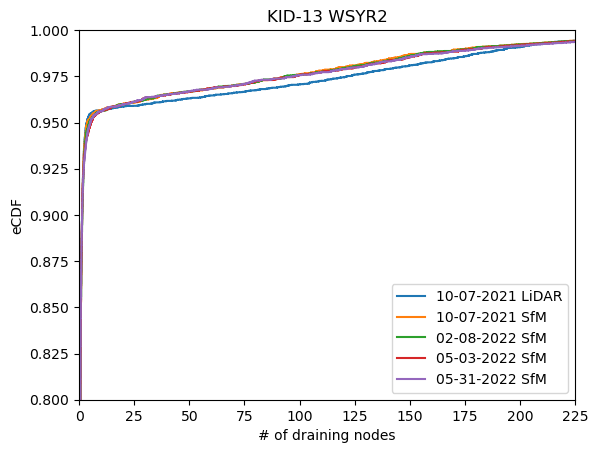

In [52]:
from scipy import stats
res0 = stats.ecdf(da_k13_20211007_lidar)
res1 = stats.ecdf(da_k13_20211007_sfm)
res2 = stats.ecdf(da_k13_20220208_sfm)
res3 = stats.ecdf(da_k13_20220503_sfm)
res4 = stats.ecdf(da_k13_20220531_sfm)
# res5 = stats.ecdf(da_m14_20220428_sfm)
# res6 = stats.ecdf(da_m14_20220601_sfm)
ax = plt.subplot()
res0.cdf.plot(ax, label='10-07-2021 LiDAR')
res1.cdf.plot(ax, label='10-07-2021 SfM')
res2.cdf.plot(ax, label='02-08-2022 SfM')
res3.cdf.plot(ax, label='05-03-2022 SfM')
res4.cdf.plot(ax, label='05-31-2022 SfM')
# res5.cdf.plot(ax, label='04-28-2022 SfM')
# res6.cdf.plot(ax, label='06-01-2022 SfM')

ax.legend(loc='lower right')
ax.set_title('KID-13 WSYR2')
ax.set_xlabel('# of draining nodes')
ax.set_ylabel('eCDF')
ax.set_xlim(0,225)
ax.set_ylim(0.8,1)

plt.show();

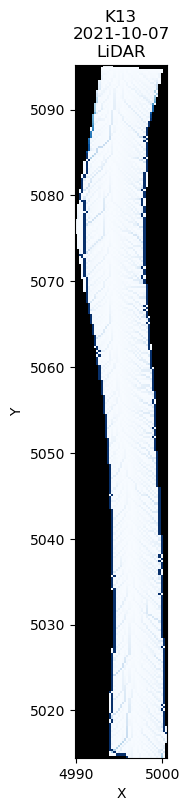

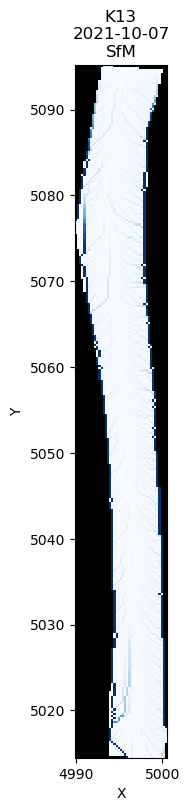

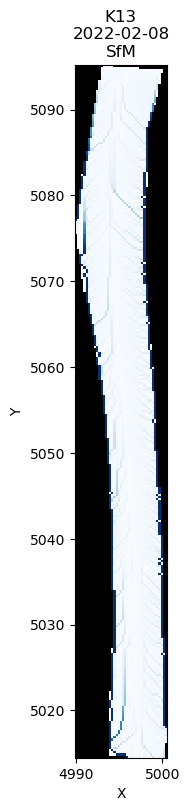

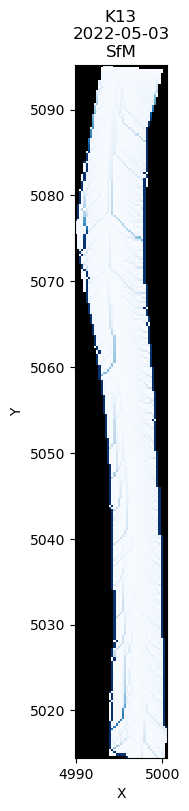

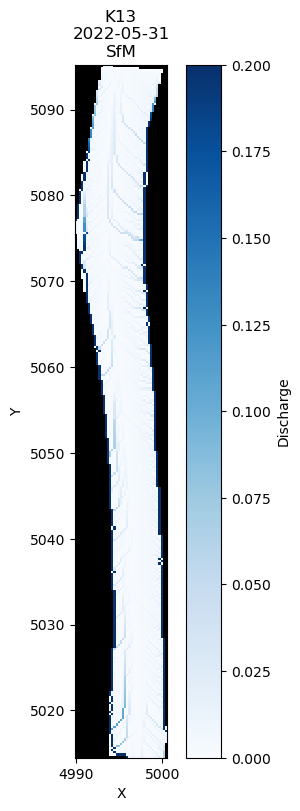

In [53]:
plt.figure(figsize=(5,9))
imshow_grid(mg_k13_20211007_lidar,'surface_water__discharge', plot_name = 'K13\n2021-10-07\nLiDAR', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_k13_20211007_sfm,'surface_water__discharge', plot_name = 'K13\n2021-10-07\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_k13_20220208_sfm,'surface_water__discharge', plot_name = 'K13\n2022-02-08\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_k13_20220503_sfm,'surface_water__discharge', plot_name = 'K13\n2022-05-03\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
plt.show();

plt.figure(figsize=(5,9))
imshow_grid(mg_k13_20220531_sfm,'surface_water__discharge', plot_name = 'K13\n2022-05-31\nSfM', \
    cmap='Blues', vmin=0, vmax=0.2, colorbar_label='Discharge')
plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220428_sfm,'surface_water__discharge', plot_name = 'M14\n2022-04-28\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
# plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220601_sfm,'surface_water__discharge', plot_name = 'M14\n2022-06-01\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, colorbar_label='Discharge')
# plt.show();

In [ ]:
mg.at_node.keys()

In [ ]:
imshow_grid(mg,'topographic__elevation',plot_name='Elevation')